FIR Filtering with b = {1, 0, 1}

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
def fir_filter(x, b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

In [33]:
fs = 1000
t = np.linspace(0, 1, fs)
x = np.sin(2* np.pi * 6 * t) + 0.2 * np.random.randn(len(t))
b = [1, 0, 1]

y = fir_filter(x, b)

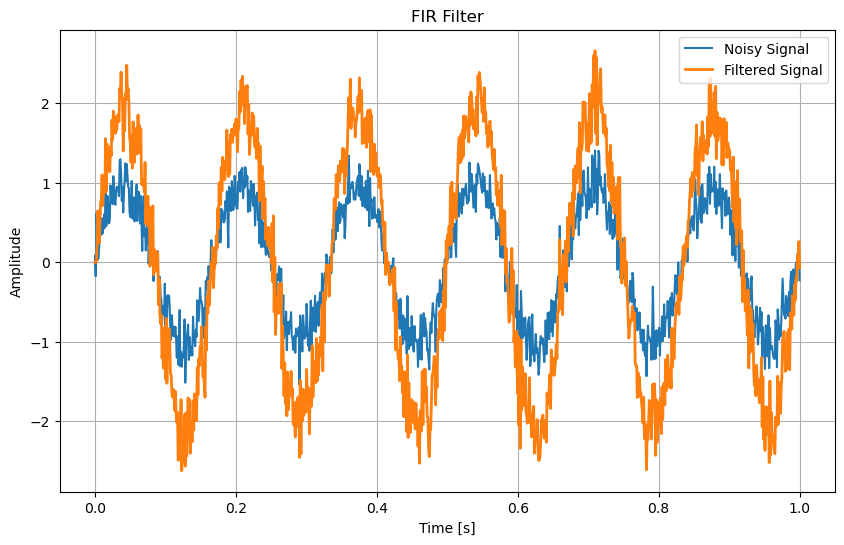

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [ ]:
IIR Filtering with b = {0.5, 0.5] and a = {1, -0.3}

In [49]:
def iir_filter(x, b, a):
    M = len(b)
    N = len(a)
    y = np.zeros(len(x))

    for n in range (len(x)):
        x_slice = x[max(0, n-M+1):n+1]
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])
    
        if n > 1:
            y_slice = y[max(0, n-N+1):n]
            y[n] -= np.dot(a[1:min(N, len(y_slice)+1)], y_slice[::-1])

    return y

In [51]:
fs = 1000
t = np.linspace(0, 1, fs)
x = np.sin(2* np.pi * 6 * t) + 0.2 * np.random.randn(len(t))
b = [0.5, 0.5]
a = [1, -0.3]
y = iir_filter(x, b, a)

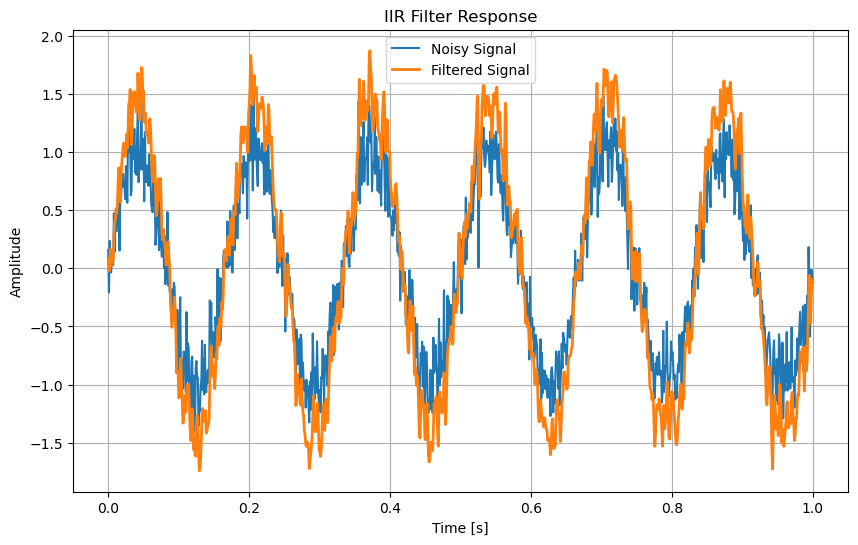

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Adaptative LMS Filtering with µ = 0.05 and M = 5

In [58]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment

    return y, e, w

In [62]:
d = np.sin(2 * np.pi * 5 * t)
mu = 0.05
num_taps = 5

y, e, w = lms_filter(x, d, mu, num_taps)

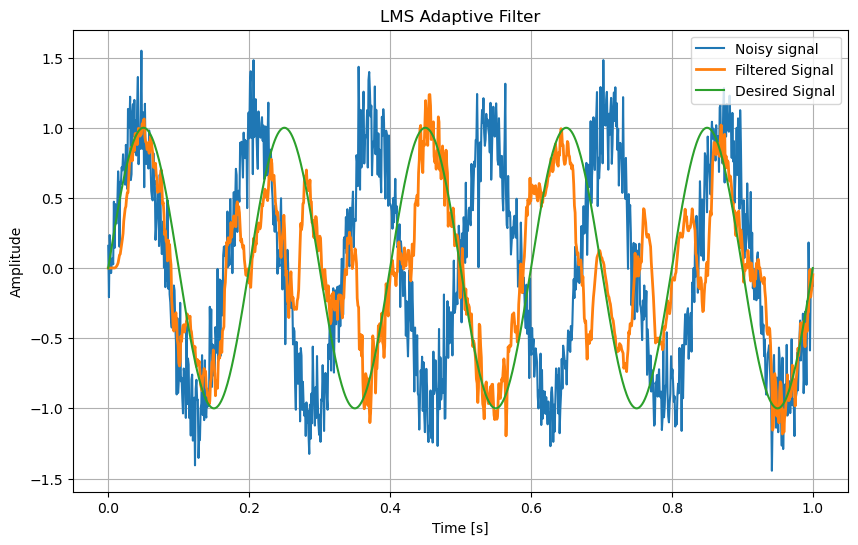

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.plot(t, d, label="Desired Signal")
plt.legend()
plt.title("LMS Adaptive Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()